In [19]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalMaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# Function to extract features using VGG16
def extract_vgg16_features(image):
    # Load VGG16 model pre-trained on ImageNet, include_top=False excludes the fully connected layers
    vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    # Get the output from the last convolutional layer
    vgg16_out = vgg16.get_layer('block5_conv3').output
    # Add GlobalMaxPooling2D layer
    vgg16_out = GlobalMaxPooling2D()(vgg16_out)
    # Create a new model
    vgg16_model = Model(inputs=vgg16.input, outputs=vgg16_out)
    # Preprocess the image and extract features
    image = tf.keras.applications.vgg16.preprocess_input(image)
    features = vgg16_model.predict(image)
    return features

When you set "include_top=False", you are using only the convolutional base of the network, which includes all the convolutional and pooling layers but excludes the fully connected layers at the end. This allows you to use the model for feature extraction or fine-tuning on a different task.

This is useful for feature extraction, where you only want the convolutional part of the network to generate feature maps.

It is also useful for transfer learning, where you can add your own custom layers on top of the convolutional base to adapt the model to a new task or dataset.

In [11]:
# Function to extract features using ResNet50
def extract_resnet50_features(image):
    # Load ResNet50 model pre-trained on ImageNet, include_top=False excludes the fully connected layers
    #"include_top=False is used to exclude the fully connected (dense) layers at the top of the network"
    resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    # Get the output from the last convolutional layer
    resnet50_out = resnet50.get_layer('conv5_block3_out').output
    # Add GlobalMaxPooling2D layer
    resnet50_out = GlobalMaxPooling2D()(resnet50_out)
    # Create a new model
    resnet50_model = Model(inputs=resnet50.input, outputs=resnet50_out)
    # Preprocess the image and extract features
    image = tf.keras.applications.resnet50.preprocess_input(image)
    features = resnet50_model.predict(image)
    print(features)
    print(features.shape)
    return features

In [18]:
# Function to overlay heatmaps on the original image

def overlay_heatmaps_on_image(image_path, feature_maps):
    # Load the original image
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    original_image = cv2.resize(original_image, (224, 224))

    # Normalize feature maps
    feature_maps = feature_maps[0]
    num_feature_maps = feature_maps.shape[-1]
    
    # Plot the original image
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    
    # Generate heatmaps
    heatmap = np.mean(feature_maps, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    # Resize heatmap to match the original image size
    heatmap = cv2.resize(heatmap, (original_image.shape[1], original_image.shape[0]))

    # Convert heatmap to RGB
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Overlay heatmap on the original image
    superimposed_img = heatmap * 0.4 + original_image

    # Plot the superimposed image
    plt.subplot(1, 2, 2)
    plt.imshow(superimposed_img.astype(np.uint8))
    plt.title("Overlayed Heatmap")

    plt.show()


In [20]:
#An example image is loaded, preprocessed, and features are extracted using both models.

1/1 [==============================] - 1s 1s/step
[[0.        0.        0.        ... 2.691609  4.3028574 0.       ]]
(1, 2048)
ResNet50 features shape: (1, 2048)


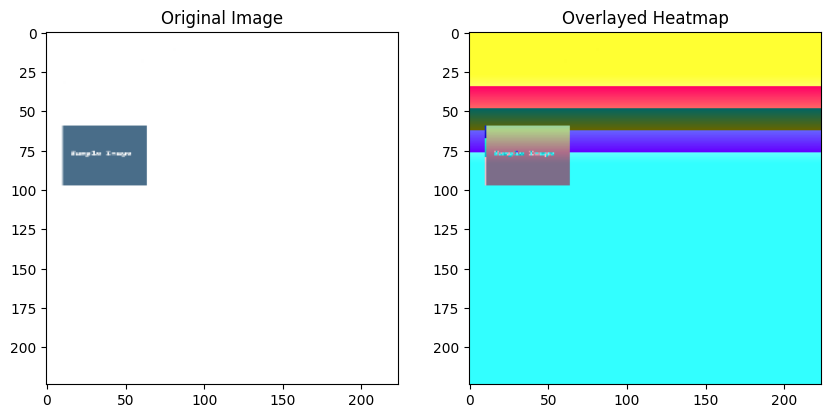

In [17]:
# Example usage

if __name__ == "__main__":
    # Load and preprocess an example image (replace 'example.jpg' with your image file)
    image_path = 'page_1.png'
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = np.expand_dims(image, axis=0)

    # Extract features using VGG16
    # vgg16_features = extract_vgg16_features(image)
    # print("VGG16 features shape:", vgg16_features.shape)

    # Extract features using ResNet50
    resnet50_features = extract_resnet50_features(image)
    print("ResNet50 features shape:", resnet50_features.shape)

    # Overlay heatmaps on the original image
    overlay_heatmaps_on_image(image_path, resnet50_features)

In [14]:
pip install opencv-python

     ---------------------------------------- 38.8/38.8 MB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
